In [6]:
import sys; from __init__ import PRP; sys.path.append(PRP)

from evaluations.utils_evals import prepare_model, make_grid
from csvflowdatamodule.CsvDataset import CsvDataModule

from torchvision.utils import flow_to_image
from glob import glob
from natsort import natsorted

## Load Model

In [2]:
%%capture
model_dir = '../SavedModels/306h8xd2_copy/'
model = prepare_model(model_dir).eval();
predictor = model.backbone_model.model.model

Lightning automatically upgraded your loaded checkpoint from v1.8.6 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../SavedModels/306h8xd2_copy/checkpoints/saved_145-epoch_val_loss:0.17428.ckpt`


## Load Data

In [7]:
model.hparams['base_dir'] = # PATH/BASE/DIR
model.hparams['preload_cache'] = False
model.hparams['batch_size'] = 5
model.binary_method = 'optimax'
model.hparams["data_file"] = 'DAVIS_D16Split'
model.hparams["flow_augmentation"] = ''

data_path  = f'../DataSplit/{model.hparams["data_file"]}_'+'{}.csv'
dm = CsvDataModule(data_path =data_path, request=model.request, num_workers=0, shuffle_fit=True, **model.hparams)
dm.setup('fit')

dataloader = iter(dm.get_dataloader('val'))

num workers : 0

Flow Transformations : []
Image Transformations : [Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))]
Mix Transformations : []

Flow Transformations : []
Image Transformations : [Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))]
Mix Transformations : []

Flow Transformations : []
Image Transformations : [Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))]
Mix Transformations : []
Loading data in : ../DataSplit/DAVIS_D16Split_{}.csv ------ Stage : fit
Boundaries : Periodic
Boundaries : Periodic
Size of dataset :
	Train : 2049 	 Val : 1356


In [14]:
batch = next(dataloader)

## Inference

In [15]:
batch, index_target = model.prediction(batch)

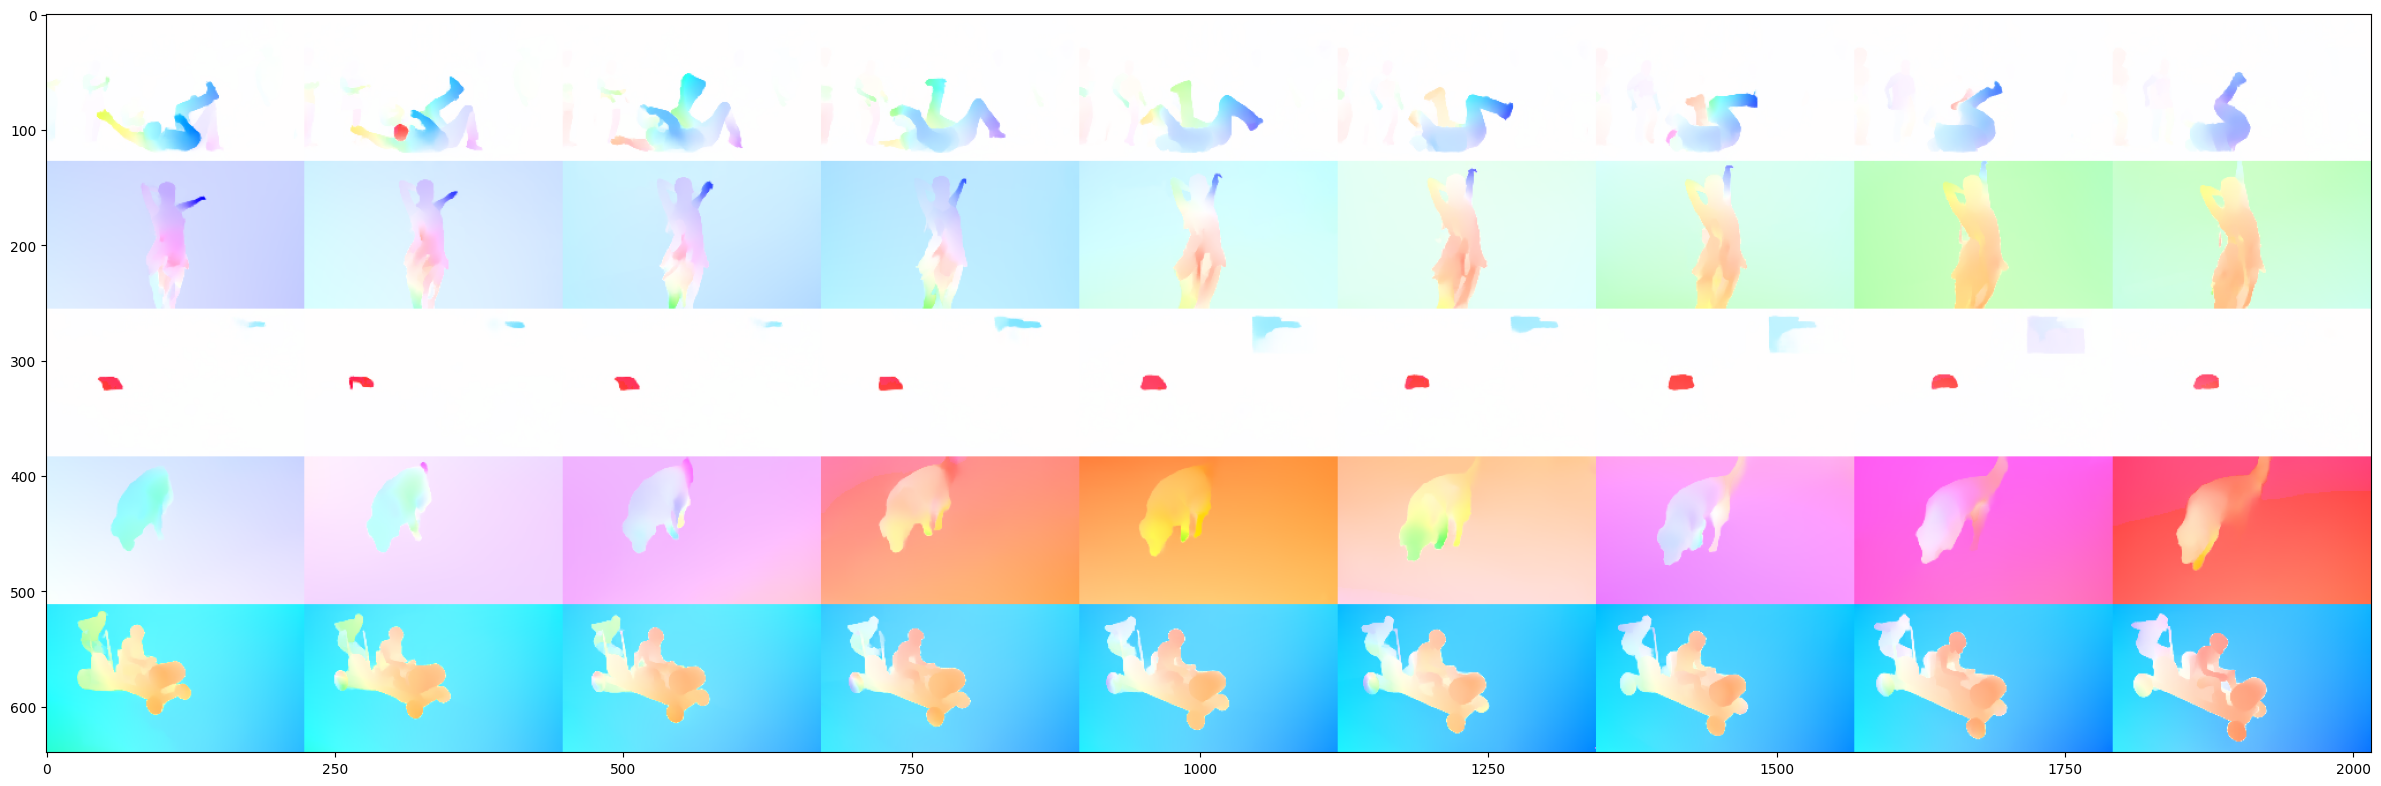

In [16]:
flow = einops.rearrange(batch['InputV'].cpu(), 'b c t h w -> b t c h w')
flowc = [flow_to_image(flow[i]) for i in range(len(flow))]
plt.figure(figsize=(30,20))
plt.imshow(einops.rearrange(flowc, 'b t c i j-> (b i) (t j) c', t=model.hparams['len_seq']))

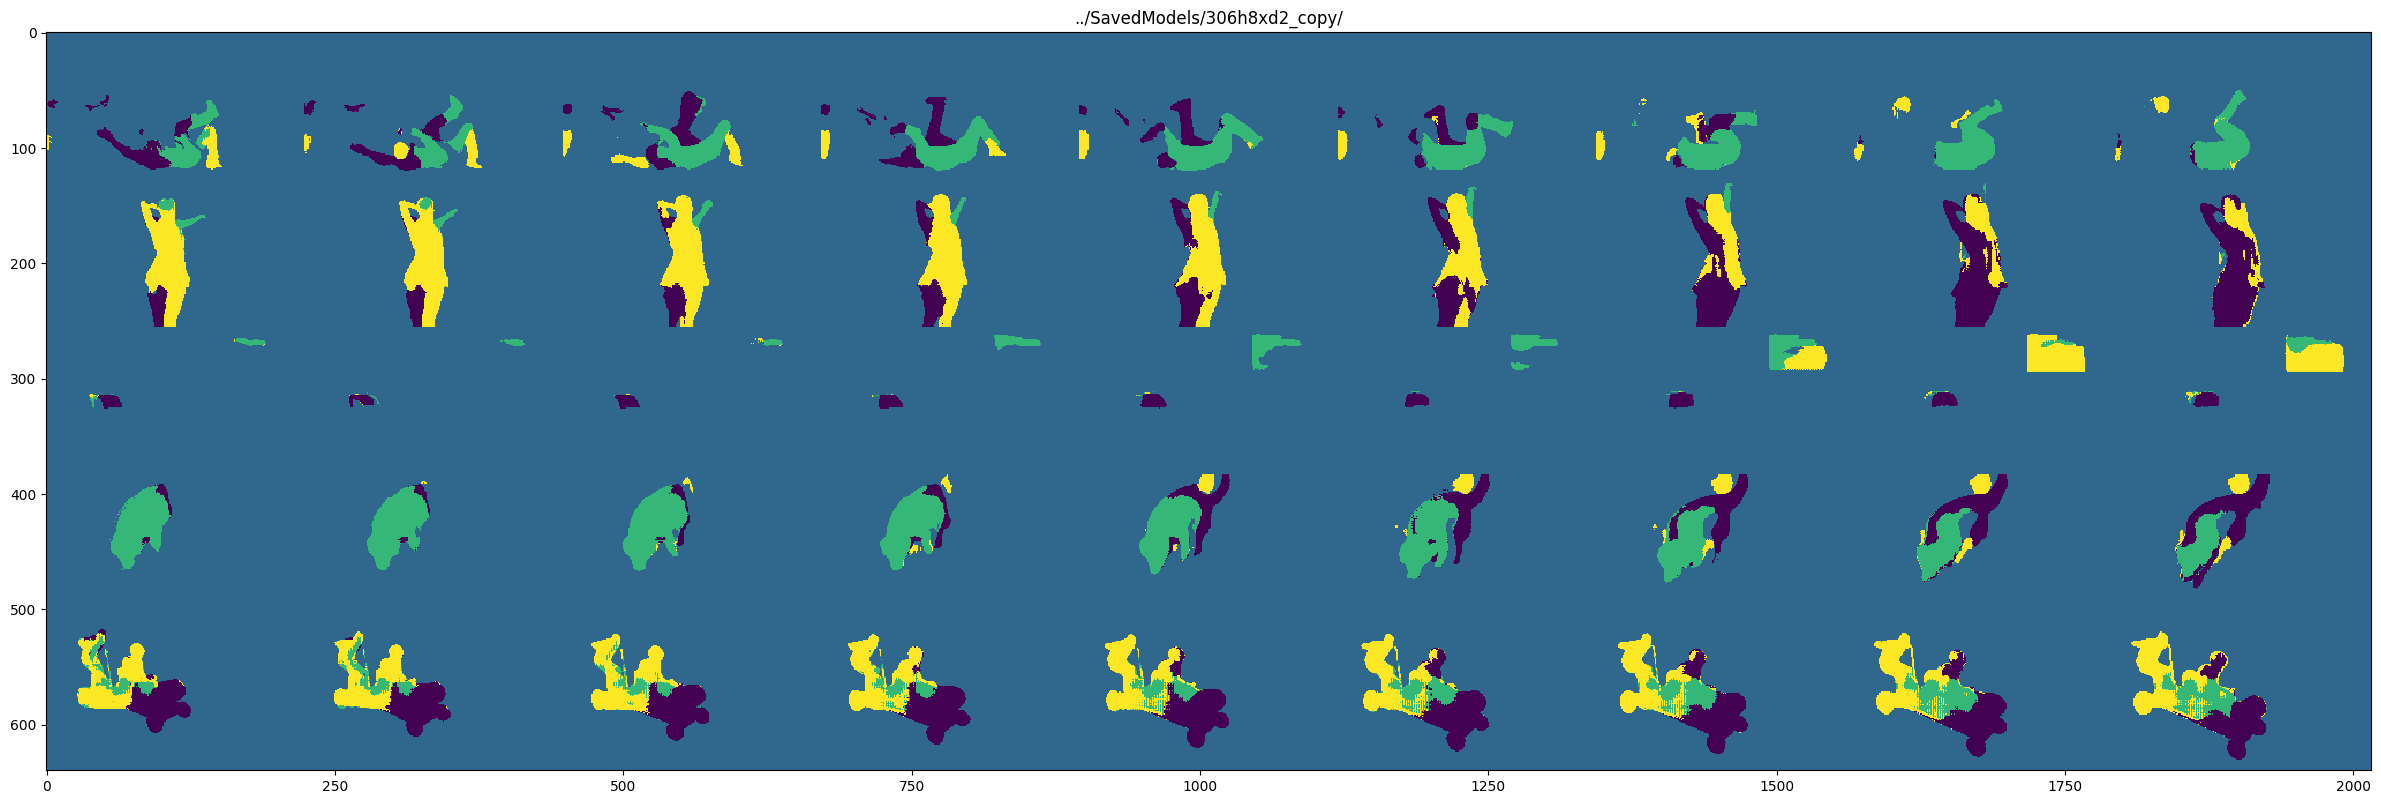

In [17]:
plt.figure(figsize=(30,15))
plt.title(model_dir)
plt.imshow(einops.rearrange(batch['PredV'].cpu(), 'b c t i j -> c (b i) (t j)').argmax(0).detach(),
           interpolation='none', vmax=3)
plt.show() 